In [1]:
import matplotlib.pyplot as plt
import tools.dataTools as dt
from constants import Constants
import figure_params
import pyaldata as pyal
from sklearn.decomposition import PCA
import os
figure_params.set_rc_params()
figure_params.setup_directories()

SUBFIG_DIR = Constants.FIG_FOLDER + 'fig5/'
if not os.path.exists(SUBFIG_DIR):
    os.makedirs(SUBFIG_DIR)

#run simulations for figure, will take a while to run
# import subprocess
# os.chdir(Constants.PROJ_DIR)
# subprocess.run(["bash", "simulation/fig_simulations/fig5_sims.sh"]) #uncomment code to make datasets if not made yet

import warnings
warnings.filterwarnings("ignore")

In [2]:
repertoires = Constants.UNIS
seeds = Constants.SEEDS
seed_ex = Constants.SEED_EX

#### Loss during reassociation adaptation

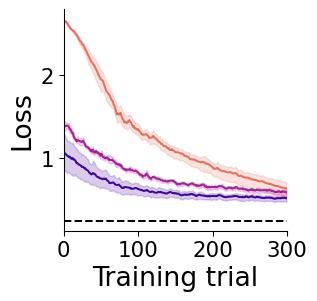

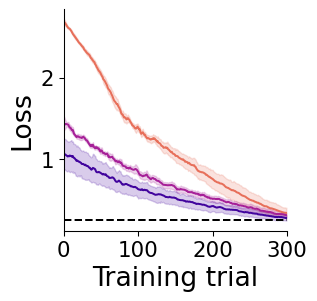

In [3]:
%matplotlib inline
smooth = True
perturbation = 'reassoc'
pert_param = 0.0
pert_set = 'v1'

#rad reassociation
fig, ax = plt.subplots(ncols = 1, figsize = (3,3))
g, params=dt.graph_loss(seeds, 'uni_rad', repertoires[1:], perturbation, pert_param, pert_set, 
    smooth=smooth, rel_loss = False, ax = ax, xlim=[0,300], colors = Constants.REPERTOIRE_COLORS[1:])
ax.hlines([0.25],xmin = 0, xmax = 300, linestyles='dashed', color = 'k')
plt.savefig(SUBFIG_DIR + "loss_"+params+".pdf", format='pdf', bbox_inches='tight' )

#onehot reassociation
fig, ax = plt.subplots(ncols = 1, figsize = (3,3))
g, params=dt.graph_loss(seeds, 'uni_onehot', repertoires[1:], perturbation, pert_param, pert_set, 
    smooth=smooth, rel_loss = False, ax = ax, xlim=[0,300], colors = Constants.REPERTOIRE_COLORS[1:])
ax.hlines([0.25],xmin = 0, xmax = 300, linestyles='dashed', color = 'k')
plt.savefig(SUBFIG_DIR + "loss_"+params+".pdf", format='pdf', bbox_inches='tight' )


#### Output after reassociation adaptation

<Axes: >

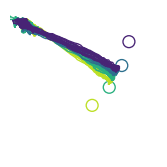

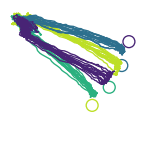

In [4]:
plt.figure(figsize = (2,2))
dt.graph_output(seed_ex, 'uni_rad', repertoires[-1], 
    perturbation = perturbation, pert_param = pert_param ,pert_set = pert_set)
plt.figure(figsize = (2,2))
dt.graph_output(seed_ex, 'uni_onehot', repertoires[-1], 
    perturbation = perturbation, pert_param = pert_param ,pert_set = pert_set)

#### Dynamics during reassociation adaptation

In [5]:
def plot_skill_adapt(sim_set, seed, repertoire, perturbation, pert_param, pert_set, epoch_fun, rel_start, elev = None, azim = None,):
    fig = plt.figure(figsize = (4,3))

    #activity during skill learning
    skill_df = dt.get_pyaldata(sim_set, seed, repertoire, 
                    epoch_fun = epoch_fun, subtract_mean = False)
    model = pyal.fit_dim_reduce_model(skill_df, PCA(Constants.PCA_DIMS), 'MCx_rates')
    skill_df = pyal.apply_dim_reduce_model(skill_df, model, 'MCx_rates', 'both_pca')
    skill_av_df = pyal.trial_average(skill_df, 'target_param')
    skill_av_df = skill_av_df.sort_values(by = 'target_param', ascending=False) #sort movements

    #activity during adaptation
    pert_df = dt.get_pyaldata(sim_set, seed, repertoire, perturbation, pert_param, pert_set,
                    epoch_fun = epoch_fun, subtract_mean = False)
    pert_df = pyal.apply_dim_reduce_model(pert_df, model, 'MCx_rates', 'both_pca')
    pert_av_df = pyal.trial_average(pert_df, 'target_param')
    pert_av_df = pert_av_df.sort_values(by = 'target_param', ascending=False)

    ax = fig.add_subplot(projection = '3d')

    #plot before adaptation
    ax = dt.plot_3d(skill_av_df, 'both_pca', [1,2,3], rel_start, ax = ax, elev = elev, azim = azim)
    #plot after adaptation
    ax = dt.plot_3d(pert_av_df, 'both_pca', [1,2,3], rel_start, ax = ax, linestyle = '--', elev = elev, azim = azim)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    params = '_'.join([sim_set,str(seed), repertoire, perturbation, str(pert_param), pert_set])
    plt.tight_layout()
    plt.savefig(SUBFIG_DIR + 'skill_adapt_3d'+params+'.pdf', format = 'pdf')


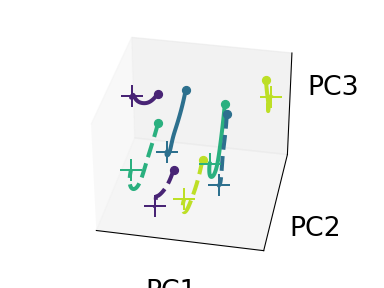

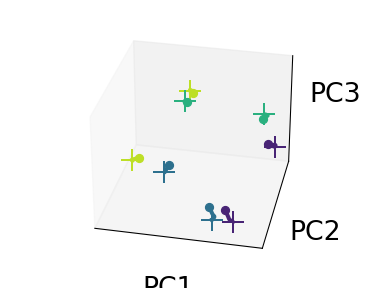

In [6]:
%matplotlib widget

#angular inputs: preparation
plot_skill_adapt('uni_rad', seed_ex, repertoires[-1], 
    perturbation, pert_param, pert_set, 
    Constants.prep_epoch, int(Constants.WINDOW_prep[0]/Constants.BIN_SIZE), azim = -79, elev=34)

#onehot inputs: preparation
plot_skill_adapt('uni_onehot', seed_ex, repertoires[-1], 
    perturbation, pert_param, pert_set, 
    Constants.prep_epoch, int(Constants.WINDOW_prep[0]/Constants.BIN_SIZE), azim = 102, elev = 30)